### Importing the libraries and extracting the dataset

In [2]:
from subprocess import check_output
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import keras
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Dropout
from keras.optimizers import Adam
from keras.callbacks import TensorBoard
import zipfile
zip_path = 'fashionmnist.zip'
extract_path = 'fashion_mnist'

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

In [3]:
train_df = pd.read_csv(f'{extract_path}/fashion-mnist_train.csv')
test_df = pd.read_csv(f'{extract_path}/fashion-mnist_test.csv')

### Preprocessing the data

In [5]:
train_data = np.array(train_df, dtype='float32')
test_data = np.array(test_df, dtype='float32')

In [6]:
x_train = train_data[:,1:]/255
y_train = train_data[:,0]
x_test = test_data[:,1:]/255
y_test = test_data[:,0]

In [7]:
x_train, x_validation, y_train, y_validation = train_test_split(x_train, y_train, test_size=0.2, random_state = 12345) 

### Visualizating samples of data

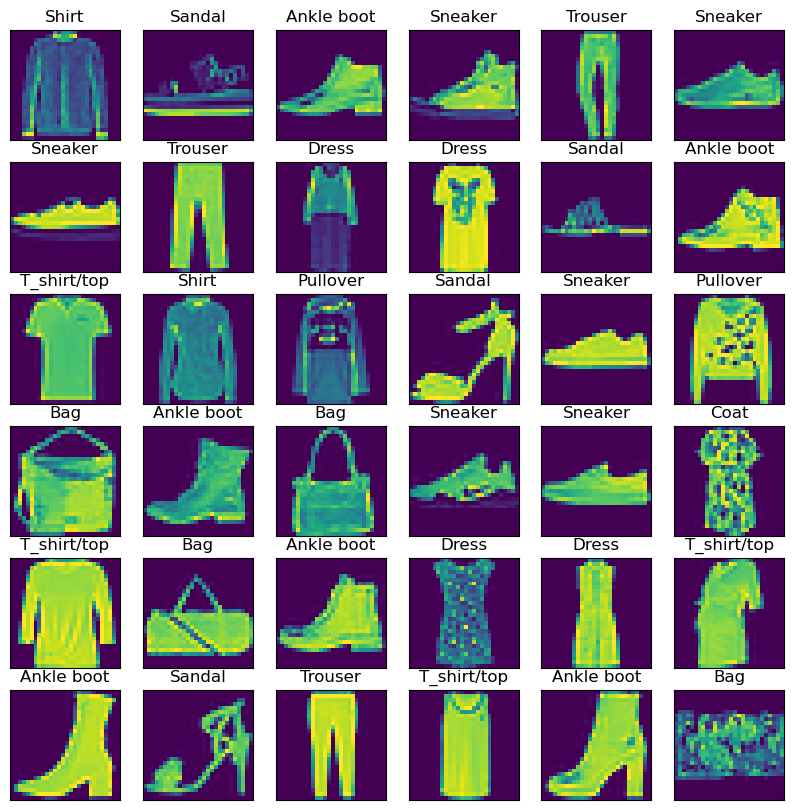

In [8]:
class_names = ['T_shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
plt.figure(figsize=(10,10))
for i in range(36):
    plt.subplot(6, 6, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i].reshape((28, 28)))
    label_index = int(y_train[i])
    plt.title(class_names[label_index])
plt.show()

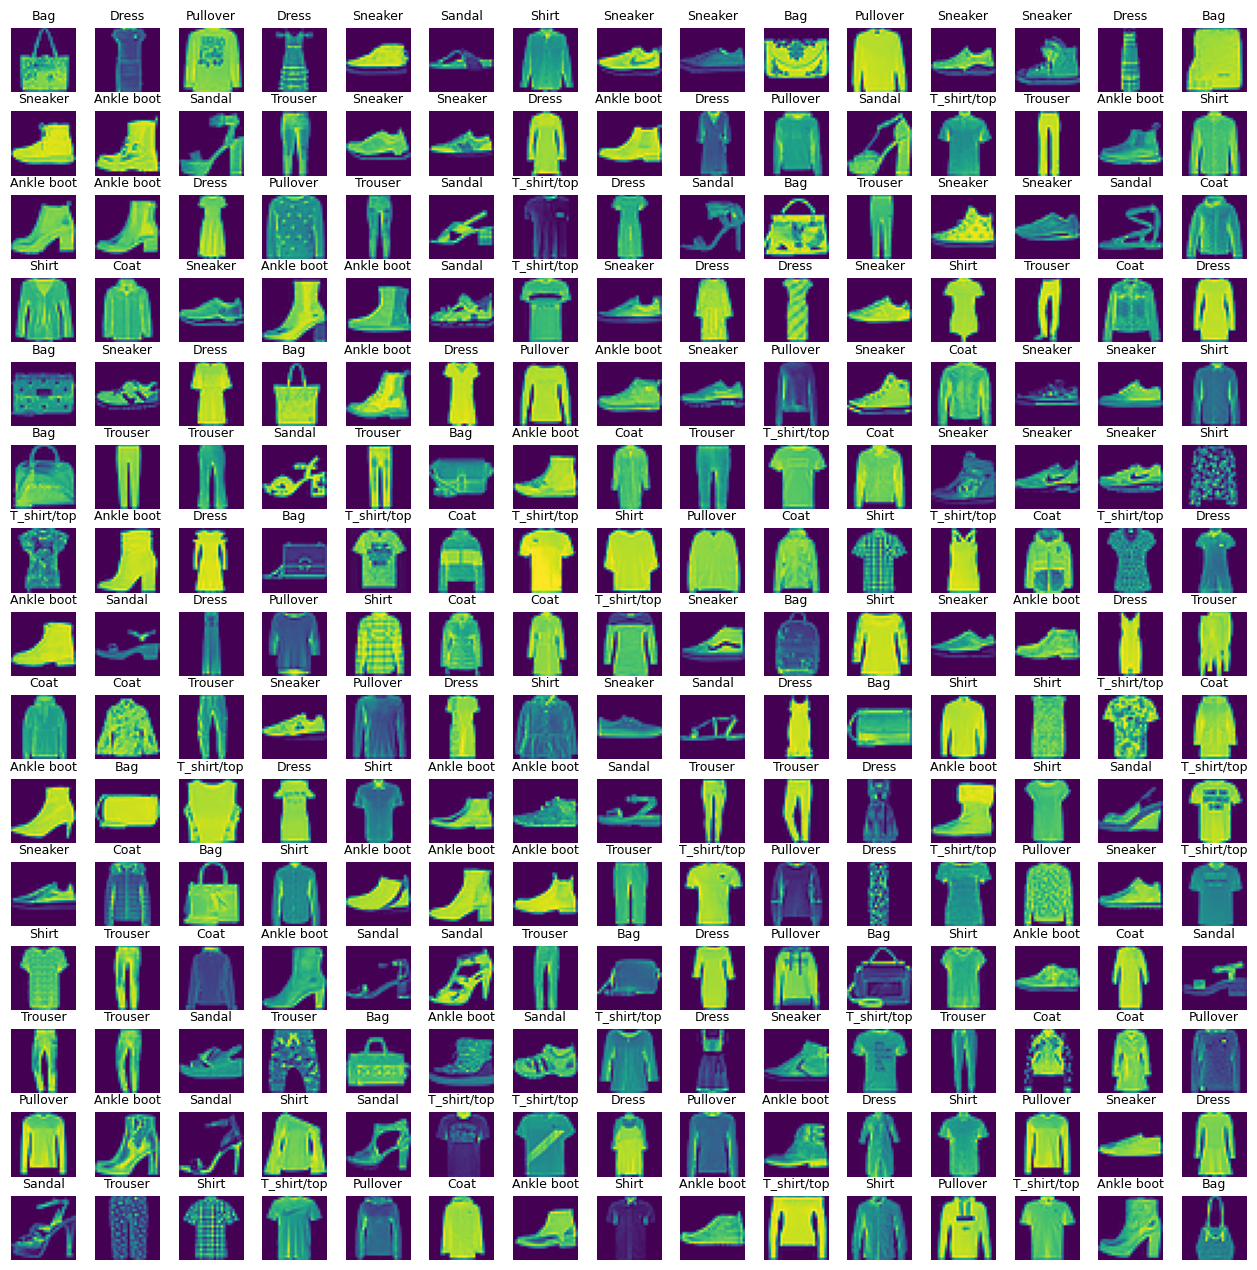

In [9]:
W_grid = 15
L_grid = 15

fig, axes = plt.subplots(L_grid, W_grid, figsize = (16, 16))
axes = axes.ravel()
n_train = len(train_data)

for i in range(0, W_grid * L_grid):
    index = np.random.randint(0, n_train)
    axes[i].imshow(train_data[index,1:].reshape((28, 28)))
    labelindex = int(train_data[index, 0])
    axes[i].set_title(class_names[labelindex], fontsize=9)
    axes[i].axis('off')

plt.subplots_adjust(hspace=0.3)

### Creating the Convolutional Neural Network (CNN)

In [10]:
image_rows = 28
image_cols = 28
batch_size = 4096
image_shape = (image_rows, image_cols,1)

In [11]:
x_train = x_train.reshape(x_train.shape[0], *image_shape)
x_test = x_test.reshape(x_test.shape[0], *image_shape)
x_validation = x_validation.reshape(x_validation.shape[0], *image_shape)

In [12]:
CNN_model = Sequential([
    Conv2D(filters=32, kernel_size=3, activation='relu', input_shape = image_shape),
    MaxPooling2D(pool_size=2),
    Dropout(0.2),
    Flatten(),
    Dense(32, activation='relu'),
    Dense(10, activation='softmax')
])

In [13]:
CNN_model.compile(loss ='sparse_categorical_crossentropy', optimizer=Adam(0.001), metrics=['accuracy'])

### Training the model

In [14]:
history = CNN_model.fit(
    x_train,
    y_train,
    batch_size=4096,
    epochs=75,
    verbose=1,
    validation_data=(x_validation, y_validation))

Epoch 1/75
12/12 ━━━━━━━━━━━━━━━━━━━━ 5s 332ms/step - accuracy: 0.3794 - loss: 1.9429 - val_accuracy: 0.6963 - val_loss: 1.0726
Epoch 2/75
12/12 ━━━━━━━━━━━━━━━━━━━━ 4s 302ms/step - accuracy: 0.7156 - loss: 0.9490 - val_accuracy: 0.7626 - val_loss: 0.7056
Epoch 3/75
12/12 ━━━━━━━━━━━━━━━━━━━━ 3s 290ms/step - accuracy: 0.7685 - loss: 0.6794 - val_accuracy: 0.7906 - val_loss: 0.5872
Epoch 4/75
12/12 ━━━━━━━━━━━━━━━━━━━━ 4s 302ms/step - accuracy: 0.7975 - loss: 0.5780 - val_accuracy: 0.8163 - val_loss: 0.5256
Epoch 5/75
12/12 ━━━━━━━━━━━━━━━━━━━━ 4s 298ms/step - accuracy: 0.8220 - loss: 0.5197 - val_accuracy: 0.8296 - val_loss: 0.4885
Epoch 6/75
12/12 ━━━━━━━━━━━━━━━━━━━━ 4s 313ms/step - accuracy: 0.8361 - loss: 0.4788 - val_accuracy: 0.8440 - val_loss: 0.4537
Epoch 7/75
12/12 ━━━━━━━━━━━━━━━━━━━━ 4s 298ms/step - accuracy: 0.8433 - loss: 0.4573 - val_accuracy: 0.8533 - val_loss: 0.4347
Epoch 8/75
12/12 ━━━━━━━━━━━━━━━━━━━━ 4s 299ms/step - accuracy: 0.8489 - loss: 0.4358 - val_accuracy: 0.

### Visualizating the history of loss functions and accuracy 

Text(0.5, 1.0, 'Train - Accuracy')

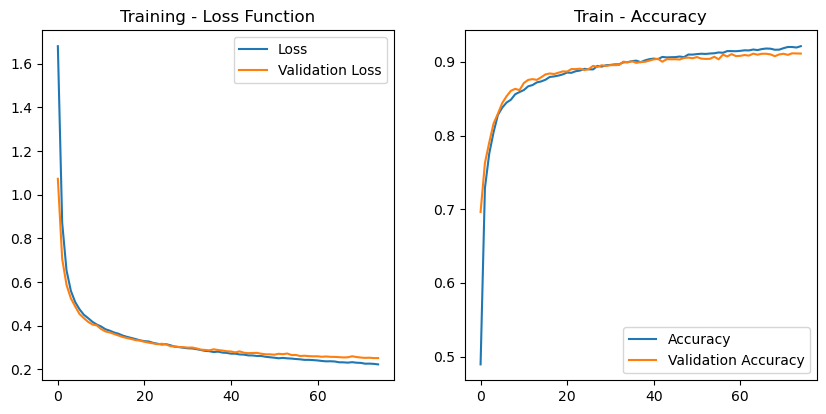

In [37]:
plt.figure(figsize=(10,10))

plt.subplot(2, 2, 1)
plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Training - Loss Function')

plt.subplot(2, 2, 2)
plt.plot(history.history['accuracy'], label='Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Train - Accuracy')

In [16]:
score = CNN_model.evaluate(x_test,y_test,verbose=0)
print('Test Loss : {:.4f}'.format(score[0]))
print('Test Accuracy : {:.4f}'.format(score[1]))

Test Loss : 0.2492
Test Accuracy : 0.9136


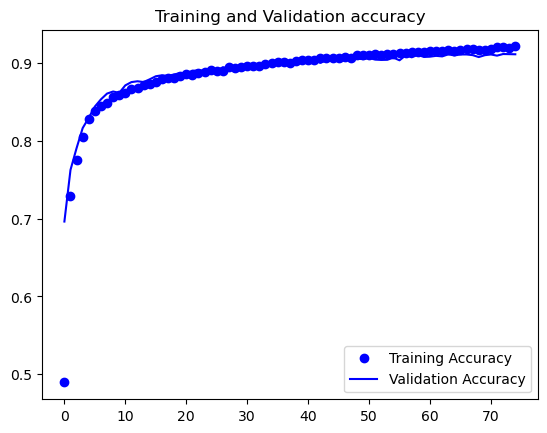

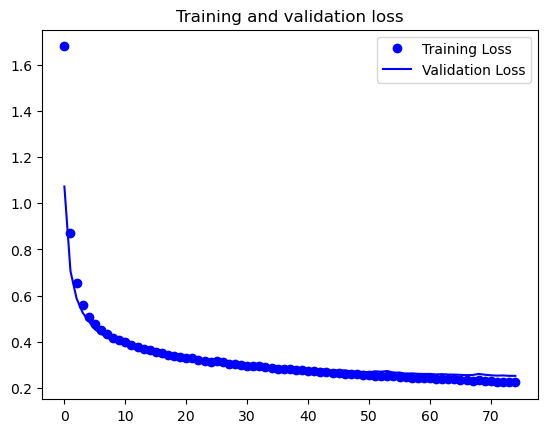

In [17]:
import matplotlib.pyplot as plt
%matplotlib inline
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation Accuracy')
plt.title('Training and Validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [27]:
predict_x = CNN_model.predict(x_test)
classes_x = np.argmax(predict_x, axis=1)
y_true = test_df.iloc[:, 0]
correct = np.nonzero(classes_x==y_true)[0]
incorrect = np.nonzero(classes_x!=y_true)[0]
from sklearn.metrics import classification_report
target_names = ["Class {}".format(i) for i in range(10)]
print(classification_report(y_true, classes_x, target_names=target_names))

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
              precision    recall  f1-score   support

     Class 0       0.84      0.86      0.85      1000
     Class 1       0.98      0.98      0.98      1000
     Class 2       0.86      0.89      0.88      1000
     Class 3       0.91      0.93      0.92      1000
     Class 4       0.90      0.87      0.88      1000
     Class 5       0.99      0.96      0.97      1000
     Class 6       0.78      0.73      0.75      1000
     Class 7       0.94      0.96      0.95      1000
     Class 8       0.98      0.98      0.98      1000
     Class 9       0.96      0.97      0.96      1000

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000



### Showcase of the accuracy of the model

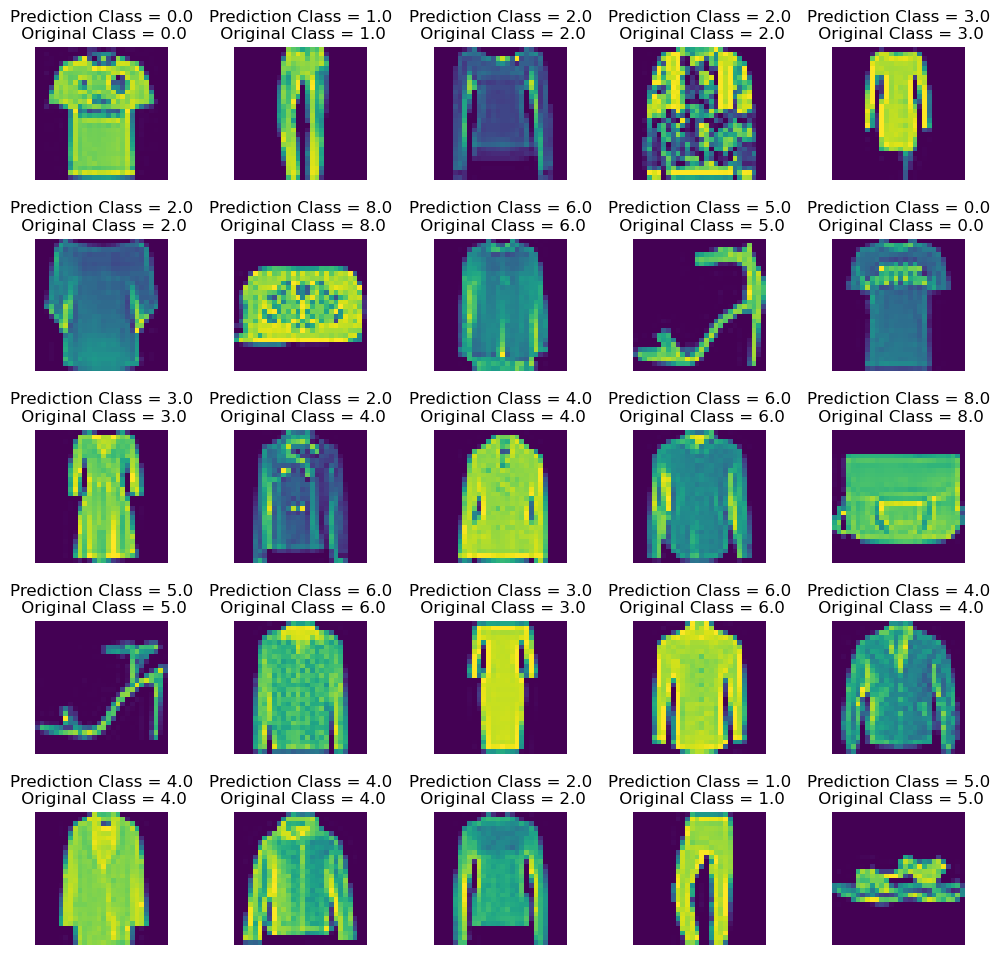

In [31]:
L = 5
W = 5
fig, axes = plt.subplots(L, W, figsize=(12,12))
axes = axes.ravel()

for i in np.arange(0, L*W):
    axes[i].imshow(x_test[i].reshape(28, 28))
    axes[i].set_title(f"Prediction Class = {classes_x[i]:0.1f}\n Original Class = {y_test[i]:0.1f}")
    axes[i].axis('off')
plt.subplots_adjust(wspace=0.5)